In [112]:
import sqlite3
import numpy as np
import mysql.connector
import pandas as pd
import getpass
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='mainakchain', api_key='B9m4DVrYYmsoW3jDSiok')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from scipy import stats
from sklearn.utils import shuffle

In [2]:
# Open the file
f = open('gps_development.csv', 'rw')
# Create a connection and get a cursor
password = getpass.getpass('Enter your mysql password: ')
cnx = mysql.connector.connect(user='root', password=password, database='gps_development')
cursor = cnx.cursor()

Enter your mysql password: ········


In [3]:
pd.read_sql('show tables;', cnx )

Tables_in_gps_development
0              SequelizeMeta
1                     alerts
2            daily_histories
3     daily_populator_logger
4           device_histories
5                    devices
6   duration_based_histories
7          look_up_histories
8         look_up_histories2
9          new_poi_histories
10             poi_histories
11                      pois
12             route_mapping
13            route_mappings
14         schema_migrations
15                 trip_pois
16               trip_trucks
17                     trips
18           truck_histories
19                    trucks
20                     users
21              vehicle_pois

In [4]:
daily_truck_histories_data = pd.read_sql('select * from daily_histories;', cnx )

In [5]:
duration_based_histories_data = pd.read_sql('select * from duration_based_histories;', cnx)

In [6]:
trucks_data = pd.read_sql('select * from trucks;', cnx)

In [7]:
trucks_data.shape

(8766, 32)

In [8]:
duration_based_histories_data.shape

(115627, 18)

In [9]:
daily_truck_histories_data.shape

(83554, 24)

In [10]:
duration_based_histories_data.describe()

distance_travelled      avg_speed       duration   distance_km  \
count       115627.000000  115627.000000  115627.000000  1.156270e+05   
mean          1909.221586       9.409833    2782.315186  5.317813e+04   
std          13238.946399      80.823778    8850.900058  5.201612e+05   
min              0.000000       0.000000       0.000000  0.000000e+00   
25%              0.100000       0.000000      60.000000  5.004625e+03   
50%              0.290000       3.700000     300.000000  8.035960e+03   
75%              3.600000      14.820000    1500.000000  1.586424e+04   
max         119528.690000   22047.950000   86389.000000  2.052247e+07   

             end_lat       end_long      start_lat     start_long  \
count  115627.000000  115627.000000  115627.000000  115627.000000   
mean       22.997684      81.620404      23.002954      81.633601   
std         4.017088       4.256100       4.008039       4.255567   
min         9.926461      69.647102       9.926461      69.647102   
25%        20.723401      77.305683      20.757785      77.306190   
50%        22.773413      82.552895      22.773527      82.584343   
75%        26.472635      85.667862      26.456936      85.706017   
max        31.875216      88.928192      31.875216      88.911522   

       old_distance_km  
count     1.156270e+05  
mean      5.319093e+04  
std       5.201581e+05  
min       0.000000e+00  
25%       4.999725e+03  
50%       8.031400e+03  
75%       1.586708e+04  
max       2.052247e+07

In [11]:
duration_based_histories_data.to_csv('duratipn_based_histories.csv', encoding='utf-8')

In [12]:
daily_truck_histories_data.to_csv('daily_truck_histories.csv', encoding='utf-8')

In [13]:
trucks_data.to_csv('trucks.csv', encoding='utf-8')

In [14]:
vehicle_sorted_duration_data = duration_based_histories_data.sort_values(['start_timestamp'], ascending=True)

In [15]:
vehicle_sorted_duration_data

vehicle_no  distance_travelled  avg_speed     start_timestamp  \
1277    864287032539742                0.00       9.26 2017-10-03 13:55:31   
1278    864287032539742                0.02       0.00 2017-10-03 13:58:31   
1279    864287032539742                0.00       7.41 2017-10-03 13:59:30   
1280    864287032539742                0.02       0.00 2017-10-03 14:18:28   
1281    864287032539742                0.99      20.37 2017-10-03 14:19:27   
2620    864495030652447                0.00       0.00 2017-10-03 20:54:40   
1282    864287032539742                6.22       0.00 2017-10-03 21:52:30   
1283    864287032539742                0.00       0.00 2017-10-03 22:09:31   
1284    864287032539742                0.09       0.17 2017-10-04 13:31:29   
701     864287032479717                0.65       0.19 2017-10-04 18:28:18   
1566    864495030627076            17779.52   15831.38 2017-10-04 19:16:33   
3177              90805                0.01       0.01 2017-10-04 21:33:30   
1134    864287032501437                3.24       0.00 2017-10-05 16:26:37   
1135    864287032501437               45.83      42.60 2017-10-05 16:33:27   
1136    864287032501437               28.77      44.45 2017-10-05 18:18:13   
1137    864287032501437                0.00       0.00 2017-10-06 04:14:28   
4404         AP07TB1989                0.17      14.82 2017-10-07 00:00:18   
4405         AP07TB1989                0.34       1.85 2017-10-07 00:55:22   
4406         AP07TB1989                0.01      16.67 2017-10-07 01:20:39   
4407         AP07TB1989                0.08       0.00 2017-10-07 01:33:17   
4408         AP07TB1989                0.07      11.11 2017-10-07 01:44:07   
4409         AP07TB1989                0.22       0.00 2017-10-07 01:44:57   
4410         AP07TB1989                0.11       5.56 2017-10-07 01:45:56   
1138    864287032501437              312.26       0.00 2017-10-07 02:08:29   
4411         AP07TB1989                0.10       0.00 2017-10-07 03:05:23   
4412         AP07TB1989                1.13       9.26 2017-10-07 03:06:22   
4413         AP07TB1989                0.18       3.70 2017-10-07 04:46:59   
4414         AP07TB1989                0.10       0.12 2017-10-07 04:47:49   
1492    864287032563429                0.00       0.00 2017-10-07 05:12:33   
1139    864287032501437                0.00       0.00 2017-10-07 14:53:15   
...                 ...                 ...        ...                 ...   
12999        BR01GC3627                0.02       0.30 2017-11-29 23:55:56   
109313       TN67AS4843                0.49       5.56 2017-11-29 23:56:13   
56346         KA01B6427                0.00       0.00 2017-11-29 23:56:31   
16316        CG04JB2584                0.32       0.00 2017-11-29 23:56:39   
45258        HR55AA9555                0.09       9.26 2017-11-29 23:56:47   
103317       RJ14GC0351                0.14      11.11 2017-11-29 23:56:50   
24681         GJ20U4455                0.08       0.00 2017-11-29 23:56:51   
111401        WB11C6385                0.16      11.11 2017-11-29 23:56:53   
8583         AP27TT2439                0.14       2.80 2017-11-29 23:56:59   
45259        HR55AA9555                0.22      12.96 2017-11-29 23:57:17   
107270       TN28AJ6775                0.00       0.00 2017-11-29 23:57:22   
56347         KA01B6427                0.01       5.56 2017-11-29 23:57:31   
13292        BR01GF2042                0.61      16.67 2017-11-29 23:57:35   
66801         NL01G5344                0.09      16.67 2017-11-29 23:57:44   
101232        PB12Y8871                0.00       0.00 2017-11-29 23:57:45   
103318       RJ14GC0351                0.04       1.85 2017-11-29 23:57:50   
24682         GJ20U4455                0.00       0.00 2017-11-29 23:57:51   
111402        WB11C6385                0.01       0.00 2017-11-29 23:57:53   
16673        CG04JB7687                0.16       9.60 2017-11-29 23:58:13   
56348         KA01B6427            

In [16]:
f = open('dipper_development.csv', 'rw')
# Create a connection and get a cursor
password = getpass.getpass('Enter your mysql password: ')
cnx = mysql.connector.connect(user='root', password=password, database='dipper_development')
cursor = cnx.cursor()

Enter your mysql password: ········


In [17]:
pd.read_sql('show tables;', cnx)

Tables_in_dipper_development
0                          accounts
1                     address_types
2                         addresses
3                       alert_types
4                     bank_accounts
5                          bookings
6                            cities
7                          comments
8                          consents
9                        consignees
10                 consigner_cities
11                  consigner_trips
12                       consigners
13                          coupons
14                          devices
15                          drivers
16                   external_trips
17                      job_loggers
18                    load_subtypes
19              loading_supervisors
20                            loads
21         location_consent_loggers
22  mailboxer_conversation_opt_outs
23          mailboxer_conversations
24          mailboxer_notifications
25               mailboxer_receipts
26                      near_cities
27                      newsletters
28              non_consigner_trips
29                    payment_infos
30               petro_card_masters
31                      petro_cards
32                      phone_types
33                           phones
34                         pincodes
35                   referral_bonus
36                 referral_bonuses
37                referral_programs
38                   referral_types
39                        referrals
40                            roles
41                       rpush_apps
42                   rpush_feedback
43              rpush_notifications
44                schema_migrations
45                  share_locations
46                         shippers
47             temp_consigner_trips
48           trucker_request_trucks
49                 trucker_requests
50                         truckers
51                           trucks
52                 user_alert_types
53                       user_roles
54                            users
55                users_newsletters

In [18]:
consignor_data = pd.read_sql('select * from consigner_trips',cnx)

In [19]:
consignor_data.head()

id  trucker_id  truck_id  shipper_id  consigner_id consignee_id source  \
0   1           2       107         NaN           NaN         None   None   
1   2           2        82         NaN           NaN         None   None   
2   3           2        66         NaN           NaN         None   None   
3   4           2        28         NaN           NaN         None   None   
4   5           2        84         NaN           NaN         None   None   

                                         data_string  invoice_no  \
0  {"card_no":"AA012027","vehicle_no":"NL01N0967"...  2418092375   
1  {"card_no":"2ff1a4c7","vehicle_no":"NL01N0978"...  5090026139   
2  {"card_no":"d3babd73","vehicle_no":"NL01N0959"...  5090026132   
3  {"card_no":"D3A29813","vehicle_no":"NL01G3100"...  2442022294   
4  {"card_no":"2FE8C937","vehicle_no":"NL01N1072"...  5000100115   

  lorry_receipt_no          ...           consigner_long loading_in_time  \
0             None          ...                      NaN             NaT   
1             None          ...                      NaN             NaT   
2             None          ...                      NaN             NaT   
3             None          ...                      NaN             NaT   
4             None          ...                      NaN             NaT   

  loading_out_time unloading_in_time unloading_out_time  IMEI loading_poi_id  \
0              NaT               NaT                NaT  None            NaN   
1              NaT               NaT                NaT  None            NaN   
2              NaT               NaT                NaT  None            NaN   
3              NaT               NaT                NaT  None            NaN   
4              NaT               NaT                NaT  None            NaN   

  unloading_poi_id unloading_poi_history_id loading_poi_history_id  
0              NaN                     None                   None  
1              NaN                     None                   None  
2              NaN                     None                   None  
3              NaN                     None                   None  
4              NaN                     None                   None  

[5 rows x 48 columns]

In [20]:
consignor_data.isnull().sum()/consignor_data.shape[0] * 100

id                            0.000000
trucker_id                    0.000000
truck_id                      0.000000
shipper_id                   53.035672
consigner_id                 49.274746
consignee_id                100.000000
source                      100.000000
data_string                   0.004725
invoice_no                    1.960784
lorry_receipt_no            100.000000
consigner_name                0.000000
consignee_name                0.000000
transporter                   0.000000
eta                           0.000000
origin                        4.431845
destination                   0.000000
loading_area                100.000000
start_date                   32.407276
end_date                    100.000000
closed_by                    34.486180
closed_date                  39.347980
is_active                     0.000000
created_at                    0.000000
updated_at                    0.000000
slug                          0.000000
card_no                  

In [22]:
consignor_data_clean = consignor_data[pd.notnull(consignor_data['loading_out_time'])]

In [23]:
consignor_data_clean = consignor_data_clean[pd.notnull(consignor_data['unloading_in_time'])]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [24]:
consignor_data_clean.isnull().sum()/consignor_data_clean.shape[0] * 100

id                            0.000000
trucker_id                    0.000000
truck_id                      0.000000
shipper_id                    6.442929
consigner_id                  6.335248
consignee_id                100.000000
source                      100.000000
data_string                   0.000000
invoice_no                    1.453697
lorry_receipt_no            100.000000
consigner_name                0.000000
consignee_name                0.000000
transporter                   0.000000
eta                           0.000000
origin                        0.000000
destination                   0.000000
loading_area                100.000000
start_date                    0.000000
end_date                    100.000000
closed_by                     1.633166
closed_date                  14.178033
is_active                     0.000000
created_at                    0.000000
updated_at                    0.000000
slug                          0.000000
card_no                  

In [25]:
consignor_data_clean.shape

(5572, 48)

In [26]:
consignor_data.shape

(21165, 48)

In [27]:
consignor_data_clean = consignor_data_clean[consignor_data_clean['consigner_code'] != 'TATA STEEL']

In [28]:
consignor_data_clean['eta']

6985     2017-08-01 00:00:00
6986     2017-08-01 00:00:00
6987     2017-08-01 00:00:00
6988     2017-08-01 00:00:00
6989     2017-08-01 00:00:00
6990     2017-08-01 00:00:00
6991     2017-08-01 00:00:00
6992     2017-08-01 00:00:00
6993     2017-08-01 00:00:00
6994     2017-08-01 00:00:00
6995     2017-08-01 00:00:00
6996     2017-08-01 00:00:00
6997     2017-08-01 00:00:00
6998     2017-08-01 00:00:00
6999     2017-08-01 00:00:00
7000     2017-08-01 00:00:00
7001     2017-08-01 00:00:00
7002     2017-08-01 00:00:00
7018     2017-08-02 00:00:00
7019     2017-08-02 00:00:00
7020     2017-08-02 00:00:00
7021     2017-08-02 00:00:00
7022     2017-08-02 00:00:00
7023     2017-08-02 00:00:00
7038     2017-08-02 00:00:00
7039     2017-08-02 00:00:00
7040     2017-08-02 00:00:00
7041     2017-08-02 00:00:00
7042     2017-08-02 00:00:00
7043     2017-08-02 00:00:00
                ...         
20815    2017-12-02 00:00:00
20816    2017-12-02 00:00:00
20830    2017-12-04 00:00:00
20831    2017-

In [29]:
consignor_data_clean['recorded_transit'] = consignor_data_clean['eta'] - consignor_data_clean['start_date']   

In [30]:
consignor_data_clean[['eta','start_date','recorded_transit']]

eta           start_date recorded_transit
6985   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6986   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6987   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6988   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6989   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6990   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6991   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6992   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6993   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6994   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6995   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6996   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6997   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6998   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
6999   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
7000   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
7001   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
7002   2017-08-01 00:00:00  2017-07-31 00:00:00  1 days 00:00:00
7018   2017-08-02 00:00:00  2017-08-01 11:00:12  0 days 12:59:48
7019   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7020   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7021   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7022   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7023   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7038   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7039   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7040   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7041   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7042   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
7043   2017-08-02 00:00:00  2017-08-01 00:00:00  1 days 00:00:00
...                    ...                  ...              ...
20815  2017-12-02 00:00:00  2017-11-30 00:00:00  2 days 00:00:00
20816  2017-12-02 00:00:00  2017-11-30 00:00:00  2 days 00:00:00
20830  2017-12-04 00:00:00  2017-11-30 00:00:00  4 days 00:00:00
20831  2017-12-07 00:00:00  2017-11-30 00:00:00  7 days 00:00:00
20836  2017-11-30 00:00:00  2017-11-30 00:00:00  0 days 00:00:00
20849  2017-12-08 00:00:00  2017-12-01 00:00:00  7 days 00:00:00
20879  2017-12-05 00:00:00  2017-12-01 00:00:00  4 days 00:00:00
20880  2017-12-05 00:00:00  2017-12-01 00:00:00  4 days 00:00:00
20883  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20884  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20887  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20888  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20889  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20895  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20912  2017-12-03 00:00:00  2017-12-01 00:00:00  2 days 00:00:00
20931  2017-12-06 00:00:00  2017-12-02 00:00:00  4 days 00:00:00
20935  2017-12-06 00:00:00  2017-12-02 00:00:00  4 days 00:00:00
20937  2017-12-06 00:00:00  2017-12-02 00:00:00  4 days 00:00:00
20944  2017-12-06 00:00:00  2017-12-02 00:00:00  4 days 00:00:00
20954  2017-12-06 00:00:00  2017-12-02 00:00:00  4 days 00:00:00
20970  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00:00:00
20973  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00:00:00
20975  2017-12-04 00:00:00  2017-12-02 00:00:00  2 days 00:00:00
20976  2017-12-04 00:00:00  2017-12-02 00:00:00  2 days 00:00:00
20980  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00:00:00
20981  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00:00:00
20982  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00:00:00
20984  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00:00:00
21000  2017-12-04 00:00:00  2017-12-02 00:00:00  2 days 00:00:00
21086  2017-12-03 00:00:00  2017-12-02 00:00:00  1 days 00

In [31]:
consignor_data_clean['actual_transit'] = consignor_data_clean['unloading_in_time'] - consignor_data_clean['loading_out_time'] 

In [32]:
consignor_data_clean['delivery'] = consignor_data_clean['recorded_transit'] - consignor_data_clean['actual_transit'] 

In [33]:
((consignor_data_clean['delivery'] >= '0 days 00:00:00') & (consignor_data_clean['delivery'] <= '0 days 00:11:00')).sum()

0

In [34]:
consignor_data_clean['delivery_status'] = ''

In [35]:
((consignor_data_clean['delivery'] < '0 days 00:00:00')).sum()

385

In [36]:
((consignor_data_clean['delivery'] >= '0 days 00:00:00') & (consignor_data_clean['delivery'] <= '0 days 24:00:00')).sum()

1715

In [37]:
((consignor_data_clean['delivery'] > '0 days 24:00:00')).sum()

3116

In [92]:
consignor_data_clean.loc[consignor_data_clean.delivery < '0 days 00:00:00', 'delivery_status'] = 'late'    

In [93]:
consignor_data_clean.loc[(consignor_data_clean['delivery'] >= '0 days 00:00:00') & (consignor_data_clean['delivery'] <= '0 days 24:00:00'), 'delivery_status'] = 'on-time'    

In [94]:
consignor_data_clean.loc[(consignor_data_clean['delivery'] > '0 days 24:00:00'), 'delivery_status'] = 'early'    

In [95]:
consignor_data_clean['delivery_status'].value_counts()

early      3116
on-time    1715
late        385
Name: delivery_status, dtype: int64

In [96]:
consignor_data_clean.sort_values(['origin','destination'])

id  trucker_id  truck_id  shipper_id  consigner_id consignee_id  \
16932  17230         222      4309       158.0           3.0         None   
17418  17723         222      5131       158.0           3.0         None   
17554  17859         222      5164       158.0           3.0         None   
16881  17175         222      2601       158.0           3.0         None   
16882  17176         222      3295       158.0           3.0         None   
20582  20909         222      4823       158.0           3.0         None   
14543  14791         222      4228       158.0           3.0         None   
14780  15028         222      4309       158.0           3.0         None   
14861  15109         222       728       158.0           3.0         None   
14935  15183         222       727       158.0           3.0         None   
15030  15278         222      4380       158.0           3.0         None   
15701  15988         222      4620       158.0           3.0         None   
15702  15989         222      4309       158.0           3.0         None   
15787  16074         222      3295       158.0           3.0         None   
15788  16075         222      4641       158.0           3.0         None   
15833  16120         222      4653       158.0           3.0         None   
16230  16522         222      4787       158.0           3.0         None   
16310  16603         222      4309       158.0           3.0         None   
16330  16623         222      4823       158.0           3.0         None   
16355  16648         222      4832       158.0           3.0         None   
16596  16889         291      4559       158.0           3.0         None   
16637  16930         222      4958       158.0           3.0         None   
16638  16931         222       971       158.0           3.0         None   
16720  17013         291      4545       158.0           3.0         None   
17294  17599         222      4752       158.0           3.0         None   
17302  17607         222      4380       158.0           3.0         None   
17588  17893         222      4641       158.0           3.0         None   
17598  17903         222      5179       158.0           3.0         None   
17699  18004         222      5205       158.0           3.0         None   
17702  18007         222      5206       158.0           3.0         None   
...      ...         ...       ...         ...           ...          ...   
19904  20230           2      5771       225.0          99.0         None   
19905  20231           2      5772       225.0          99.0         None   
19508  19827           2      5640       228.0          99.0         None   
19509  19828           2      5641       228.0          99.0         None   
19582  19903           2      5663       228.0          99.0         None   
19583  19904           2      5664       228.0          99.0         None   
19726  20047           2      5704       228.0          99.0         None   
19727  20048           2      5705       228.0          99.0         None   
19738  20059           2      5709       228.0          99.0         None   
19906  20232           2      5773       228.0          99.0         None   
19907  20233           2      5774       228.0          99.0         None   
19543  19862           2      5649       229.0          99.0         None   
19544  19863           2      5650       229.0          99.0         None   
19739  20060           2      5710       226.0          99.0         None   
19740  20061           2      5711       226.0          99.0         None   
19789  20115           2      5732       226.0          99.0         None   
19790  20116           2      5733       226.0          99.0         None   
19899  20225           2      5767       226.0          99.0         None   
20251  20578           2      5767       226.0          99.0         None   
20256  20583           2      5872       226.0          99.0         None   
20257 

In [97]:
consignor_data_clean['total_early'] = 0
consignor_data_clean['total_on_time'] = 0
consignor_data_clean['total_late'] = 0

In [98]:
def stats_of_routes(orig, des):
    early = 0
    on_time = 0
    late = 0
    early = consignor_data_clean[consignor_data_clean['origin'] == orig][consignor_data_clean['destination'] == des][consignor_data_clean['delivery_status'] == 'early'].shape[0]    
    on_time = consignor_data_clean[consignor_data_clean['origin'] == orig][consignor_data_clean['destination'] == des][consignor_data_clean['delivery_status'] == 'on-time'].shape[0]    
    late = consignor_data_clean[consignor_data_clean['origin'] == orig][consignor_data_clean['destination'] == des][consignor_data_clean['delivery_status'] == 'late'].shape[0]    
    
    consignor_data_clean.total_early = np.where((consignor_data_clean.origin == orig) & (consignor_data_clean.destination == des), early, consignor_data_clean['total_early']).astype(int) 
    consignor_data_clean.total_on_time = np.where((consignor_data_clean.origin == orig) & (consignor_data_clean.destination == des), on_time, consignor_data_clean['total_on_time']).astype(int) 
    consignor_data_clean.total_late = np.where((consignor_data_clean.origin == orig) & (consignor_data_clean.destination == des), late, consignor_data_clean['total_late']).astype(int) 

#     sns.countplot(x="delivery_status", data=test)
#     plt.show()

In [99]:
origin_list = consignor_data_clean['origin'].unique().tolist()

In [100]:
dest_list = consignor_data_clean['destination'].unique().tolist()

In [101]:
for origi in origin_list:
    for desti in dest_list:
        if consignor_data_clean[consignor_data_clean.origin == origi][consignor_data_clean.destination == desti].shape[0] > 0: 
            stats_of_routes(origi,desti)
        else:
            continue

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [102]:
consignor_data_clean[['delivery_status','origin','destination','delivery','total_early','total_on_time','total_late']]

delivery_status      origin    destination          delivery  \
6985          on-time    Garividi  Visakhapatnam   0 days 22:30:30   
6986            early    Garividi  Visakhapatnam   2 days 15:30:30   
6987          on-time    Garividi  Visakhapatnam   0 days 22:12:19   
6988          on-time    Garividi  Visakhapatnam   0 days 22:24:39   
6989          on-time    Garividi  Visakhapatnam   0 days 22:22:53   
6990          on-time    Garividi  Visakhapatnam   0 days 22:13:44   
6991          on-time    Garividi  Visakhapatnam   0 days 22:13:05   
6992          on-time    Garividi  Visakhapatnam   0 days 22:26:49   
6993            early    Garividi  Visakhapatnam   2 days 12:22:54   
6994            early    Garividi  Visakhapatnam  10 days 17:53:41   
6995          on-time    Garividi  Visakhapatnam   0 days 22:03:47   
6996          on-time    Garividi  Visakhapatnam   0 days 22:14:29   
6997            early    Garividi  Visakhapatnam   6 days 23:16:44   
6998          on-time    Garividi  Visakhapatnam   0 days 22:19:00   
6999          on-time    Garividi  Visakhapatnam   0 days 22:30:30   
7000          on-time    Garividi  Visakhapatnam   0 days 11:15:30   
7001          on-time    Garividi  Visakhapatnam   0 days 04:42:26   
7002          on-time    Garividi  Visakhapatnam   0 days 22:22:50   
7018            early       Noida         Nagpur  15 days 00:00:49   
7019          on-time    Bamnipal         Jajpur   0 days 23:24:13   
7020          on-time    Bamnipal         Jajpur   0 days 23:22:01   
7021          on-time    Bamnipal         Jajpur   0 days 23:23:43   
7022          on-time    Bamnipal         Jajpur   0 days 23:06:40   
7023          on-time    Bamnipal         Jajpur   0 days 23:21:36   
7038          on-time    Bamnipal         Jajpur   0 days 22:47:07   
7039          on-time    Bamnipal         Jajpur   0 days 23:13:53   
7040          on-time    Bamnipal         Jajpur   0 days 23:23:03   
7041          on-time    Bamnipal         Jajpur   0 days 23:13:39   
7042          on-time    Bamnipal         Jajpur   0 days 23:05:34   
7043          on-time    Bamnipal         Jajpur   0 days 23:15:34   
...               ...         ...            ...               ...   
20815         on-time    Bamnipal  Visakhapatnam   0 days 14:36:43   
20816         on-time    Bamnipal  Visakhapatnam   0 days 16:10:29   
20830           early  Jamshedpur          PATNA   1 days 21:39:07   
20831           early  Jamshedpur          KORBA   5 days 10:27:02   
20836            late     Garbham  Visakhapatnam -1 days +18:57:52   
20849           early  Jamshedpur          KORBA   4 days 12:33:36   
20879           early  Jamshedpur        KOLKATA   3 days 16:54:43   
20880           early  Jamshedpur        KOLKATA   3 days 05:19:17   
20883         on-time   Dhenkanal  Visakhapatnam   0 days 14:06:18   
20884         on-time   Dhenkanal  Visakhapatnam   0 days 14:35:33   
20887         on-time   Dhenkanal  Visakhapatnam   0 days 13:17:55   
20888           early   Dhenkanal  Visakhapatnam   1 days 07:57:51   
20889            late   Dhenkanal  Visakhapatnam -1 days +22:10:19   
20895         on-time     Bamaloi  Visakhapatnam   0 days 17:29:23   
20912         on-time     Bamaloi  Visakhapatnam   0 days 17:29:23   
20931           early  Jamshedpur        KOLKATA   3 days 09:55:24   
20935           early  Jamshedpur         HOWRAH   3 days 01:54:04   
20937           early  Jamshedpur        KOLKATA   3 days 05:41:37   
20944           early  Jamshedpur        KOLKATA   2 days 05:33:35   
20954           early  Jamshedpur        KOLKATA   3 days 05:05:35   
20970         on-time    Bamnipal         Jajpur   0 days 23:22:36   
20973         on-time    Bamnipal         Jajpur   0 days 23:22:01   
20975         on-time   Dhenkanal  Visakhapatnam   0 days 13:03:28   
20976         on-time   Dhenkanal  Visakhapatnam   0 days 10:10:31   
20980         on-time    Bamnipal         Jajpur   0 days 23:31:09   
20981         on

In [103]:
#to plot a graph based on delivery status between origin and destination

origin = raw_input("Please enter a valid origin: ")
destination = raw_input("Please enter a valid destination: ")

test = consignor_data_clean[consignor_data_clean['origin'] == origin][consignor_data_clean['destination'] == destination]                    
sns.countplot(x="delivery_status", data=test)
plt.show()


KeyboardInterrupt: 

In [104]:
plot_route_delivery_df = consignor_data_clean[['origin','destination','total_early','total_on_time','total_late']]  

In [105]:
plot_route_delivery_df.drop_duplicates(inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [106]:
plot_route_delivery_df['route'] = plot_route_delivery_df['origin'] + ' - ' + plot_route_delivery_df['destination']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [107]:
plot_route_delivery_df = plot_route_delivery_df.sort_values('total_late')

In [109]:
consignor_data_clean.to_csv('consignor_data_clean.csv')

In [115]:
top_labels = ['early', 'on-time','late']

colors = ['rgba(123, 251, 2, 0.8)','rgba(255, 195, 0, 0.8)',
          'rgba(231, 76, 60, .8)']

x_data = []
for r in list(plot_route_delivery_df.route):
    lis = plot_route_delivery_df.loc[plot_route_delivery_df.route == r, ['total_early','total_on_time','total_late']].values.flatten().tolist()
    x_data.append(lis)

y_data = list(plot_route_delivery_df.route)


traces = []

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        traces.append(go.Bar(
            x=xd[i],
            y=yd,
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(
                        color='rgb(248, 248, 249)',
                        width=1)
            )
        ))

layout = go.Layout(
    autosize=False,
    width=5000,
    height=5000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
        
    xaxis=dict(
        autorange=True,
        autotick=True,
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        autorange=True,
        autotick=False,
        tickwidth=10,
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    showlegend=False
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd, 
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='bar-colorscale')

In [91]:
consignor_data_clean['delivery_status'][].value_counts()

late       3116
on-time    1715
early       385
Name: delivery_status, dtype: int64

In [116]:
trace0 = go.Scatter(
    x = plot_route_delivery_df['route'],
    y = plot_route_delivery_df['total_early'],
    mode = 'lines',
    name = 'early'
)
trace1 = go.Scatter(
    x = plot_route_delivery_df['route'],
    y = plot_route_delivery_df['total_on_time'],
    mode = 'lines',
    name = 'on-time'
)
trace2 = go.Scatter(
    x = plot_route_delivery_df['route'],
    y = plot_route_delivery_df['total_late'],
    mode = 'lines',
    name = 'late'
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    autosize=False,
    width=5000,
    height=8000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))

cf.iplot(data, filename='line-chart-for-various-routes')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mainakchain/0 or inside your plot.ly account where it is named 'line-chart-for-various-routes'


In [86]:
test = plot_route_delivery_df = consignor_data_clean[['origin','destination','total_early','total_on_time','total_late','delivery']]  

In [89]:
test['route'] = test['origin'] + " - " + test['destination']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [90]:
test['delivery_hours'] = test['delivery'].apply(lambda x: x.total_seconds()//3600)   

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [592]:
group_stats = {}
groupby_data = test.groupby('route')

for group in list(test['route'].unique()):
    data_from_group = groupby_data.get_group(group)['delivery']
    td = np.median(data_from_group.tolist())
    group_stats[group] = td.seconds//3600

In [688]:
test_shuffle_ = test_shuffle[test_shuffle.groupby('route').route.transform(len) > 1]

In [690]:
test_shuffle_.shape, test_shuffle.shape

((5124, 2), (5216, 2))

In [703]:
np.random.seed(619517)

data_header = 'delivery_hours'
group_header = 'route'

group_stats = {}
groupby_data = test_shuffle_.groupby([group_header])

for group in list(test_shuffle_['route'].unique()):
    data_from_group = groupby_data.get_group(group)['delivery_hours']
    stat = np.median(list(data_from_group))
    group_stats[group] = stat

fig = ff.create_violin(test_shuffle_.dropna(), data_header='delivery_hours', group_header='route',
                       height=500, width=800, use_colorscale=True, group_stats=group_stats)
py.iplot(fig, filename='Multiple Violins')

The draw time for this plot will be slow for clients without much RAM.


/usr/local/lib/python2.7/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [714]:
test1

route  delivery
6985    Garividi - Visakhapatnam      22.0
6986    Garividi - Visakhapatnam      63.0
6987    Garividi - Visakhapatnam      22.0
6988    Garividi - Visakhapatnam      22.0
6989    Garividi - Visakhapatnam      22.0
6990    Garividi - Visakhapatnam      22.0
6991    Garividi - Visakhapatnam      22.0
6992    Garividi - Visakhapatnam      22.0
6993    Garividi - Visakhapatnam      60.0
6994    Garividi - Visakhapatnam     257.0
6995    Garividi - Visakhapatnam      22.0
6996    Garividi - Visakhapatnam      22.0
6997    Garividi - Visakhapatnam     167.0
6998    Garividi - Visakhapatnam      22.0
6999    Garividi - Visakhapatnam      22.0
7000    Garividi - Visakhapatnam      11.0
7001    Garividi - Visakhapatnam       4.0
7002    Garividi - Visakhapatnam      22.0
7018              Noida - Nagpur     360.0
7019           Bamnipal - Jajpur      23.0
7020           Bamnipal - Jajpur      23.0
7021           Bamnipal - Jajpur      23.0
7022           Bamnipal - Jajpur      23.0
7023           Bamnipal - Jajpur      23.0
7038           Bamnipal - Jajpur      22.0
7039           Bamnipal - Jajpur      23.0
7040           Bamnipal - Jajpur      23.0
7041           Bamnipal - Jajpur      23.0
7042           Bamnipal - Jajpur      23.0
7043           Bamnipal - Jajpur      23.0
...                          ...       ...
20815   Bamnipal - Visakhapatnam      14.0
20816   Bamnipal - Visakhapatnam      16.0
20830         Jamshedpur - PATNA      45.0
20831         Jamshedpur - KORBA     130.0
20836    Garbham - Visakhapatnam      -6.0
20849         Jamshedpur - KORBA     108.0
20879       Jamshedpur - KOLKATA      88.0
20880       Jamshedpur - KOLKATA      77.0
20883  Dhenkanal - Visakhapatnam      14.0
20884  Dhenkanal - Visakhapatnam      14.0
20887  Dhenkanal - Visakhapatnam      13.0
20888  Dhenkanal - Visakhapatnam      31.0
20889  Dhenkanal - Visakhapatnam      -2.0
20895    Bamaloi - Visakhapatnam      17.0
20912    Bamaloi - Visakhapatnam      17.0
20931       Jamshedpur - KOLKATA      81.0
20935        Jamshedpur - HOWRAH      73.0
20937       Jamshedpur - KOLKATA      77.0
20944       Jamshedpur - KOLKATA      53.0
20954       Jamshedpur - KOLKATA      77.0
20970          Bamnipal - Jajpur      23.0
20973          Bamnipal - Jajpur      23.0
20975  Dhenkanal - Visakhapatnam      13.0
20976  Dhenkanal - Visakhapatnam      10.0
20980          Bamnipal - Jajpur      23.0
20981          Bamnipal - Jajpur      23.0
20982          Bamnipal - Jajpur      23.0
20984          Bamnipal - Jajpur      23.0
21000  Dhenkanal - Visakhapatnam      14.0
21086   Garividi - Visakhapatnam      21.0

[5216 rows x 2 columns]

In [ ]:
#violin plot showing the distribution of delays and early transport
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import graph_objs

import numpy as np
from scipy import stats

data_list = np.random.randn(100)
data_list.tolist()

fig = ff.create_violin(data_list, colors='#604d9e')
py.iplot(fig, filename='')

In [719]:
data_list = list(test1['delivery'][test1['route'] == 'Garividi - Visakhapatnam'])

fig = ff.create_violin(data_list, colors='#604d9e', height=1000, width=1000)
py.iplot(fig, filename='One Violin')

In [727]:
 ax = sns.violinplot(x="route", y="delivery_hours",data=test, dodge=False)


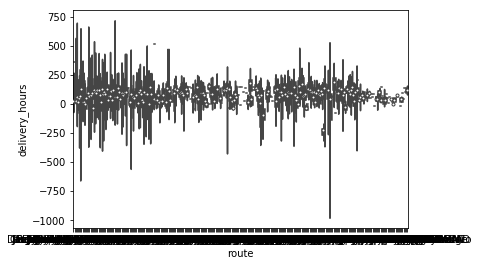

In [728]:
plt.show()

In [1]:

# import plotly.plotly as py
# import plotly.figure_factory as ff
# from plotly.graph_objs import graph_objs

# import numpy as np
# import pandas as pd
# from scipy import stats

# np.random.seed(619517)
# Nr = 250
# y = np.random.randn(Nr)
# gr = np.random.choice(list("ABCDE"), Nr)
# norm_params = [(0, 1.2), (0.7, 1), (-0.5, 1.4), (0.3, 1), (0.8, 0.9)]

# for i, letter in enumerate("ABCDE"):
#     y[gr == letter] *= norm_params[i][1] + norm_params[i][0]
# df = pd.DataFrame(dict(Score = y, Group = gr))

# fig = ff.create_violin(df, data_header='Score', group_header='Group',
#                        height=500, width=800)
# py.iplot(fig, filename='Multiple Violins')